In [1]:
%config IPCompleter.greedy=True
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from WalkSAT import WalkSAT

In [3]:
fileName = r"uf20-01.cnf"
executions = 100
restarts = 10
iteractions = 1000
wp = 0.4
tl = 5
wps = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
iterationList = [10, 100, 200, 500, 1000, 2000, 5000]
restartsList = [1, 5, 10, 20, 30, 40]
tabuList = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
iterationsToSolve = {}
iterations = {}

In [4]:
for wp in wps:
    print(wp)
    c1 = WalkSAT(fileName, executions, restarts, iteractions, wp, tl )
    output = c1.start()[0]
    o = output[output[:,0] == 1][:,2]
    iterationsToSolve[wp] = o.mean()

0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9


In [5]:
iterationsToSolve

{0.1: 276.86,
 0.2: 273.82,
 0.3: 160.68,
 0.4: 196.73,
 0.5: 163.18,
 0.6: 214.54,
 0.7: 165.42,
 0.8: 156.47,
 0.9: 148.69}

In [6]:
accuraciesFrame = pd.DataFrame(iterationsToSolve, index=['iterations']).T
#accuraciesFrame.sort_values(by=["wp"], axis=0 ,ascending=False, inplace=True)
accuraciesFrame

,iterations
0.1,276.86
0.2,273.82
0.3,160.68
0.4,196.73
0.5,163.18
0.6,214.54
0.7,165.42
0.8,156.47
0.9,148.69


Text(0, 0.5, 'Iterations to solve')

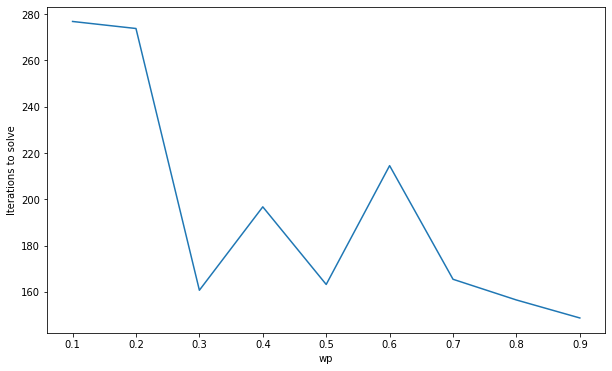

In [7]:
plt.figure(figsize=(10,6))
data = np.array(iterationsToSolve)
plt.plot(accuraciesFrame)
plt.xlabel('wp')
plt.ylabel('Iterations to solve')

In [8]:
iterations = {}

for i in iterationList:
    print(i)
    c1 = WalkSAT(fileName, executions, restarts, i, wp, tl )
    output = c1.start()[0]
    outcomes = output[:,0]
    trueOutcomes = outcomes.sum()
    if trueOutcomes == 0:
        successRate = 0
    else:
        successRate =  trueOutcomes / (len(outcomes))
    iterations[i] = successRate

10
100
200
500
1000
2000
5000


In [9]:
iterations

{10: 0.025056947608200455,
 100: 0.4608294930875576,
 200: 0.7246376811594203,
 500: 0.9803921568627451,
 1000: 1.0,
 2000: 1.0,
 5000: 1.0}

Text(0, 0.5, 'Success rate')

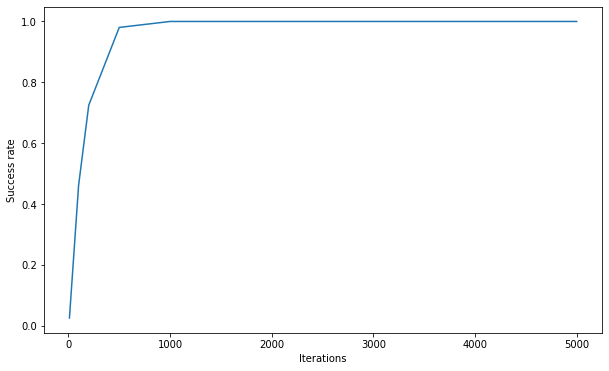

In [10]:
plt.figure(figsize=(10,6))
data = np.array(iterations)
plt.plot(pd.DataFrame(iterations, index=['iterations']).T)
plt.xlabel('Iterations')
plt.ylabel('Success rate')

In [11]:
iterations = {}

for i in tabuList:
    print(i)
    c1 = WalkSAT(fileName, executions, restarts, iteractions, wp, i )
    output = c1.start()[0]
    outcomes = output[:,0]
    trueOutcomes = outcomes.sum()
    if trueOutcomes == 0:
        successRate = 0
    else:
        successRate =  trueOutcomes / (len(outcomes))
    iterations[i] = successRate

1
2
3
4
5
6
7
8
9
10


Text(0, 0.5, 'Success rate')

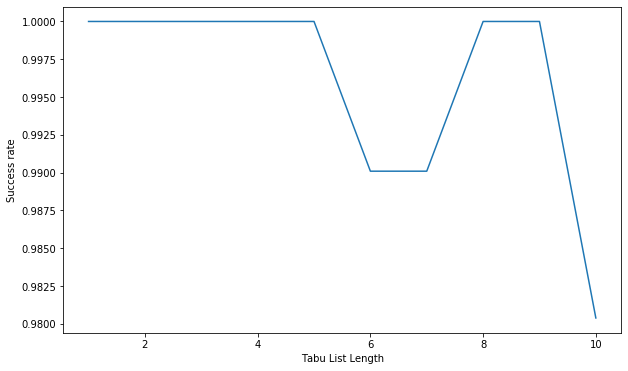

In [12]:
plt.figure(figsize=(10,6))
data = np.array(iterations)
plt.plot(pd.DataFrame(iterations, index=['iterations']).T)
plt.xlabel('Tabu List Length')
plt.ylabel('Success rate')